In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
# !pwd
# path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/'
path = '/home/ubuntu/pynb/DG_datachallenge'


### Reload Model  
https://keras.io/models/about-keras-models/

In [3]:
from keras.models import Model, Sequential
from keras.models import load_model

Using TensorFlow backend.


#### XXX model.save version -- does not appear right... best to load cnnModel_definition and load weights to it...

In [4]:
## load model (not complied...)
# cnn_model = load_model('./model/modelNweights_v3.1a.h5')

/usr/local/lib/python3.4/dist-packages/keras/models.py:240: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
## complie model -- required if loading from local... strange...
# config = cnn_model.get_config()
# model = Sequential.from_config(config)

In [ ]:
# model.summary()

### Either load cnn_model def. or redefine the exact same model...  then load.weights(weights_file) to the model

In [15]:
cnn_model0 = load_model('./model/CNNmodelNOweights_3diffconvkerns.h5')

/usr/local/lib/python3.4/dist-packages/keras/models.py:240: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [17]:
cnn_model0.load_weights('./model/model_v3.1a.h5')

In [ ]:
cnn_model0.summary()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, ZeroPadding2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, rmsprop


def cnn_model():
    model = Sequential()

    model.add(Convolution2D(64, (3, 3), padding='same', kernel_initializer='lecun_uniform',
                            input_shape=(256, 256, 3),
                            activation='relu'))
    model.add(Convolution2D(64, (3, 3), kernel_initializer='lecun_uniform',
                            activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Convolution2D(128, (5, 5), padding='same', kernel_initializer='lecun_uniform',
                            activation='relu'))
    
    model.add(Convolution2D(128, (5, 5), kernel_initializer='lecun_uniform',
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Convolution2D(256, (7, 7), padding='same', kernel_initializer='lecun_uniform',
                            activation='relu'))
    
    model.add(Convolution2D(256, (7, 7), kernel_initializer='lecun_uniform',
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
   
    model.add(Dense(2, activation='softmax'))
    return model

In [11]:
M = cnn_model()

In [12]:
M.load_weights('./model/model_v3.1a.h5')

In [ ]:
M.summary()

### Load Holdout data

In [8]:
XHold = np.load(path+'/building_set/X_holdout_all'+'.npy')
YHold = np.load(path+'/building_set/Y_holdout_all'+'.npy')
print(XHold.shape, YHold.shape)

(4400, 256, 256, 3) (4400, 2)


### Get Predictions | calculate log-loss

In [14]:
# from sklearn.metrics import log_loss
# YHoldpreds = model.predict(XHold, verbose=1) ## too large for local -- run and save and transfer...

# print("Validation Log Loss: {}".format(log_loss(YHold, YHoldpreds)))  ## Not right... ?!?!?
# 4400/4400 [==============================] - 75s      

In [13]:
from sklearn.metrics import log_loss
YHoldpreds = M.predict(XHold, verbose=1) ## too large for local -- run and save and transfer...

print("Validation Log Loss: {}".format(log_loss(YHold, YHoldpreds)))  

4400/4400 [==============================] - 67s     

In [19]:
from sklearn.metrics import log_loss
YHoldpreds = cnn_model0.predict(XHold, verbose=1) ## too large for local -- run and save and transfer...

print("Validation Log Loss: {}".format(log_loss(YHold, YHoldpreds)))  

4400/4400 [==============================] - 67s     

In [28]:
def convertKerasY21Darray(kerasY):
    return np.argmax(kerasY,axis = 1)

In [29]:
Y_Hpreds = convertKerasY21Darray(YHoldpreds)
Y_Htest = convertKerasY21Darray(YHold)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(Y_Htest, Y_Hpreds)

0.93409090909090908

In [33]:
print (classification_report(Y_Htest,Y_Hpreds,target_names = ['no_buildings','buildings']) )

              precision    recall  f1-score   support

no_buildings       0.98      0.95      0.96      4000
   buildings       0.60      0.80      0.69       400

 avg / total       0.95      0.93      0.94      4400



In [35]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

1 1


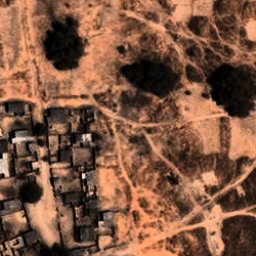

In [38]:
n=246 #123  
print(Y_Htest[n], Y_Hpreds[n])
array_to_img(XHold[n]) 


0 0


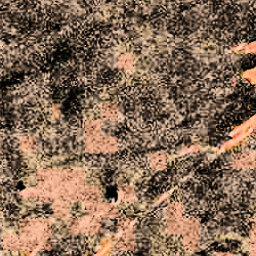

In [39]:
n=510 #789 
print(Y_Htest[n], Y_Hpreds[n])
array_to_img(XHold[n])

### SAVE YHoldpreds

In [24]:
XY_holdout_all = pd.read_csv('./building_set/XY_holdout_all.csv', index_col=0)

In [25]:
XY_holdout_all

,Oidx,filename,Blabel,augment
0,0,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
1,1,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
2,2,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
3,3,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
4,4,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
5,5,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
6,6,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
7,7,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
8,8,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0
9,9,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0


In [62]:
HoldPredProb = pd.DataFrame(YHoldpreds, columns=[['YHoldPredProb_nb', 'YHoldPredProb_b']])
HoldPredProb

,YHoldPredProb_nb,YHoldPredProb_b
0,0.014134,0.985866
1,0.031087,0.968913
2,0.005324,0.994676
3,0.758569,0.241431
4,0.071391,0.928609
5,0.000006,0.999994
6,0.002077,0.997923
7,0.011786,0.988214
8,0.220529,0.779470
9,0.095006,0.904994


In [ ]:
# pd.DataFrame(YHold, columns=[['YHold_nb', 'YHold_b']]).astype('int')

In [71]:
HoldTestPredoutcomes = pd.concat([pd.DataFrame(Y_Htest, columns=['YHold_test']), 
                                  pd.DataFrame(Y_Hpreds, columns=['YHold_predict']),
                                  pd.DataFrame(Y_Htest-Y_Hpreds, columns=['predict_diff']),
                                 ], axis=1)
HoldTestPredoutcomes

,YHold_test,YHold_predict,predict_diff
0,1,1,0
1,1,1,0
2,1,1,0
3,1,0,1
4,1,1,0
5,1,1,0
6,1,1,0
7,1,1,0
8,1,1,0
9,1,1,0


In [61]:
pd.DataFrame(Y_Htest, columns=['YHold_test']).YHold_test.value_counts()

0    4000
1     400
Name: YHold_test, dtype: int64

In [70]:
Y_Htest-Y_Hpreds

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
(4400-(HoldTestPredoutcomes.predict_diff!=0).sum())/4400

0.93409090909090908

In [81]:
XY_holdout_update = pd.concat([XY_holdout_all,HoldPredProb, HoldTestPredoutcomes], axis=1)
XY_holdout_update

,Oidx,filename,Blabel,augment,YHoldPredProb_nb,YHoldPredProb_b,YHold_test,YHold_predict,predict_diff
0,0,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.014134,0.985866,1,1,0
1,1,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.031087,0.968913,1,1,0
2,2,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.005324,0.994676,1,1,0
3,3,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.758569,0.241431,1,0,1
4,4,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.071391,0.928609,1,1,0
5,5,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.000006,0.999994,1,1,0
6,6,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.002077,0.997923,1,1,0
7,7,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.011786,0.988214,1,1,0
8,8,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.220529,0.779470,1,1,0
9,9,/home/ubuntu/pynb/DG_datachallenge/building_se...,1,0,0.095006,0.904994,1,1,0


In [82]:
XY_holdout_update.to_csv('./building_set/XY_holdout_update.csv')